# Paper: Prevention and Control of Zika as a Mosquito-Borne and Sexually Transmitted Disease: A Mathematical Modeling Analysis

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

2.5931400000000004


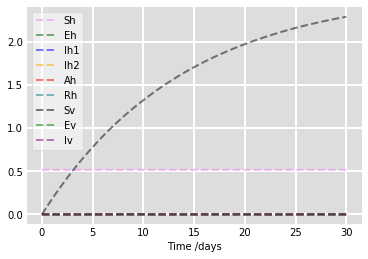

In [2]:
# Initial conditions

Sh0 = 0.516
Eh0 = 0.000657
Ih10 = 0.000657
Ih20 = 0.000657
Ah0 = 0.000657
Rh0 = 0
Nh = Sh0 + Eh0 + Ih10 + Ih20 + Ah0 + Rh0
Nv = 5 * Nh
Sv0 = 1e-4
Ev0 = 1e-4
Iv0 =  1e-4

# A grid of time points (in days)
t = np.linspace(0, 30, 50) 

#parameters
a = 0.5
b = 0.4
c = 0.5
eta = 0.1
beta = 0.05
kappa = 0.6
tao = 0.3
theta = 18
m = 5
V_h = 1/5
V_v = 10
gamma_h1 = 1/5
gamma_h2 = 1/20
gamma_h = 1/7
mu_v = 1/14


# The SIR model differential equations.
def deriv(y, t,Nh, a, b, c, eta, beta, kappa, tao, theta, m, V_h, V_v, gamma_h1, gamma_h2, gamma_h, mu_v):
    Sh, Eh, Ih1, Ih2, Ah, Rh, Sv, Ev, Iv = y
    dShdt = -a * b * (Iv/Nh) * Sh - beta * ((kappa * Eh + Ih1 + tao * Ih2) / Nh ) * Sh
    dEhdt = theta * (-a * b * (Iv/Nh) * Sh - beta * ((kappa * Eh + Ih1 + tao * Ih2) / Nh ) * Sh) - V_h * Eh
    dIh1dt = V_h * Eh - gamma_h1 * Ih1
    dIh2dt = gamma_h1 * Ih1 - gamma_h2 * Ih2
    dAhdt = (1 - theta) * (a * b * (Iv/Nh) * Sh - beta * ((kappa * Eh + Ih1 + tao * Ih2) / Nh ) * Sh) - gamma_h * Ah
    dRhdt = gamma_h2 * Ih2 + gamma_h * Ah
    dSvdt = mu_v * Nv - a * c * ((eta * Eh + Ih1)/Nh) * Sv - mu_v * Sv
    dEvdt = a * c * ((eta * Eh + Ih1)/Nh) - (V_v + mu_v) * Ev
    dIvdt = V_v * Ev - mu_v * Iv

    return dShdt, dEhdt, dIh1dt, dIh2dt, dAhdt, dRhdt, dSvdt, dEvdt, dIvdt


# Initial conditions vector
y0 = Sh0, Eh0, Ih10, Ih20, Ah0, Rh0, Sv0, Ev0, Iv0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(Nh, a, b, c, eta, beta, kappa, tao, theta, m, V_h, V_v, gamma_h1, gamma_h2, gamma_h, mu_v))
Sh, Eh, Ih1, Ih2, Ah, Rh, Sv, Ev, Iv = ret.T

#change < 0 to 0
Sh[Sh<0] = 0
Eh[Eh<0] = 0
Ih1[Ih1<0] = 0
Ih2[Ih2<0] = 0
Ah[Ah<0] = 0
Rh[Rh<0] = 0
Sv[Sv<0] = 0
Ev[Ev<0] = 0
Iv[Iv<0] = 0

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, Sh, 'violet', alpha=0.5, lw=2, label='Sh', linestyle='dashed')
ax.plot(t, Eh, 'darkgreen', alpha=0.5, lw=2, label='Eh', linestyle='dashed')
ax.plot(t, Ih1, 'blue', alpha=0.5, lw=2, label='Ih1', linestyle='dashed')
ax.plot(t, Ih2, 'orange', alpha=0.5, lw=2, label='Ih2', linestyle='dashed')
ax.plot(t, Ah, 'red', alpha=0.5, lw=2, label='Ah', linestyle='dashed')
ax.plot(t, Rh, 'teal', alpha=0.5, lw=2, label='Rh', linestyle='dashed')
ax.plot(t, Sv, 'black', alpha=0.5, lw=2, label='Sv', linestyle='dashed')
ax.plot(t, Ev, 'green', alpha=0.5, lw=2, label='Ev', linestyle='dashed')
ax.plot(t, Iv, 'purple', alpha=0.5, lw=2, label='Iv', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
#save to csv file
a = np.asarray([t, Sh, Eh, Ih1, Ih2, Ah, Rh, Sv, Ev, Iv]) 

# np.savetxt("zika.csv", a, delimiter=",")